## Prediction Using Supervised Machine Learning
### Simple Linear regression
#### Problem Statement :
###### Predict the percentage of marks of an student based on the number of study hours
#### By - Akshay Kachave

#### Importing the necessary packages

In [31]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
import matplotlib.pyplot as plt  
%matplotlib inline

In [47]:
df = pd.read_csv('Student Performance.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [48]:
df.shape

(25, 2)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [50]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [51]:
X = df.iloc[:, :1].values  
y = df.iloc[:, 1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Checking Assumption

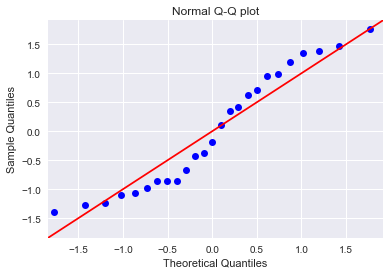

In [52]:
import statsmodels.api as sm
import pylab
z=((y-np.mean(y))/np.std(y))
sm.qqplot(z,line='45')
plt.title("Normal Q-Q plot")
pylab.show() 

Based on this Normal QQ plot, it does appear as though the resting Students Scores are approximately normally distributed. The plot is fairly linear, with just a couple points straying from the line.

<Figure size 1440x720 with 0 Axes>

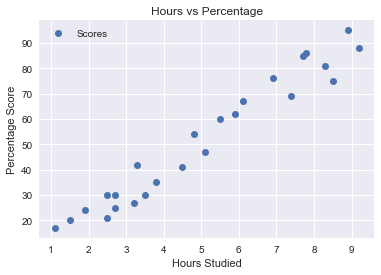

In [53]:
# Plotting the distribution of scores
plt.figure(figsize=(20,10))
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From above Scatter plot we can conclude that there is a positive linear relationship between Scores and Hours. i.e More a student study more his/her score will be. So, we can use linear regression for our dataset.

### Training Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model 

In [55]:
regression_model = LinearRegression()
lm=linear_model.LinearRegression()
model=lm.fit(X,y)
y_predicted = lm.predict(X)
# printing values
print('Slope:' ,lm.coef_)
print('Intercept:', lm.intercept_)

Slope: [9.77580339]
Intercept: 2.483673405373196


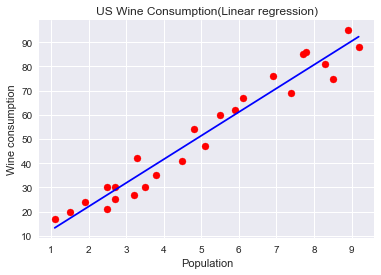

In [56]:
#Visualization of regression
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.title('US Wine Consumption(Linear regression)')
plt.xlabel('Population')
plt.ylabel('Wine consumption')
plt.show()

In [57]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y, 'Predicted': y_predicted})  
df.head()

,Actual,Predicted
0,21,26.923182
1,47,52.340271
2,27,33.766244
3,75,85.578002
4,30,36.698985


In [58]:
# predicted score if a student studies for 9.25 hrs/ day 
hours = 9.25
own_pred = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.90985477015731


The Predicted Score of the student,if he/she study 9.25 hrs is 92.91

#### Model Evaluation 

In [41]:
mse = mean_squared_error(y, y_predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y,y_predicted)
r2 = model.score(X,y)
print('Root mean squared error: ', rmse)
print('MAE:',mae)
print('R2 score: ', r2) 

Root mean squared error:  5.374265578592619
MAE: 4.972805319866375
R2 score:  0.9529481969048356


The model has high R-square and minimum RMSE